In [1]:
import tweepy
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup
import importlib
import json
from helper import *
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
pd.options.display.max_columns = 200

In [3]:
df=pd.read_csv("out.csv")
df=pd.concat([df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")][:6])

In [4]:
df = df.drop(["age", "gender",'hashtags','Unnamed: 0'], axis=1)
df = df.drop(["link to tweet"], axis=1)

df = df.drop_duplicates(subset='name',keep=False)

In [5]:
#dups = df[df['name'].duplicated(keep = False)]['name'].value_counts()
#for n in dups.keys():
#    if dups[n] > 2:
#        df.drop(df[df['name'] == n].index,inplace = True)

In [6]:
column_to_move = df.pop("retweets")
df.insert(df.shape[1], "retweets", column_to_move)
df.reset_index(drop = True, inplace = True)

In [7]:
from sklearn.metrics import r2_score

### multiple linear regression

lets convert all the categorical values to numerical

In [8]:
for c in ['city','country','verified','is quote','using trends?']:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes

now we remove all of the stuff we dont need(everything thats simply text)

In [9]:
ndf = df.drop(['respectability','text','trending','name'] , axis = 1)
#ndf.drop('retweets',axis = 1,inplace=True)
ndf

,city,country,acount age,total tweets,followers,following,verified,views,likes,quote retweets,comments,word count,is quote,hashtag count,using trends?,retweets
0,3183,4,3.2,228,50,22,0,13,0,0,0,11,0,0,0,0
1,3851,4,7.7,34240,772,41,0,50,0,0,0,24,0,0,0,0
2,226,4,14.5,4599,1966,2436,0,28,1,0,0,34,0,0,0,0
3,174,4,12.5,45282,2103,1333,0,82,1,0,0,7,1,0,0,0
4,2981,4,10.1,8474,84,179,0,27,1,0,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16887,802,2,9.2,1065,404,3001,0,151,5,0,0,24,0,0,0,0
16888,4188,2,11.6,1301,133,605,0,212,7,0,0,15,0,2,0,0
16889,1158,2,9.6,13743,99,469,0,162,1,0,0,40,1,0,0,0
16890,1355,2,13.2,16288,2252,2283,0,36,0,0,0,20,0,12,0,1


In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = ndf.drop('retweets',axis = 1)
y = ndf['retweets']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

lr = linear_model.LinearRegression() # create a linear regression object
lr.fit(x_train, y_train);

y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.9067706184616595

after some testing, it apeard that some random states gave us better results, so will se which one gives us the best

In [11]:
max_i = 0
max_r = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    
    lr = linear_model.LinearRegression() # create a linear regression object
    lr.fit(x_train, y_train);
    
    y_pred_train = lr.predict(x_train)
    
    if r2_score(y_train,y_pred_train) > max_r:
        max_i = i
        max_r = r2_score(y_train,y_pred_train)

print(max_i,max_r)

467 0.9524050674205125


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state = 467)

lr = linear_model.LinearRegression() # create a linear regression object
lr.fit(x_train, y_train);

y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.9524050674205125

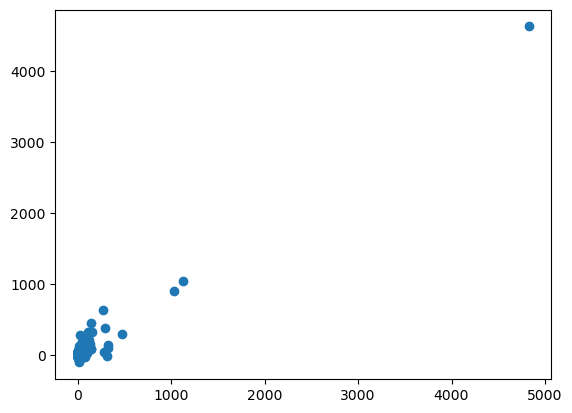

In [13]:
plt.scatter(y_train,y_pred_train)